In [2]:
import numpy as np
from matplotlib import pyplot as plt
import rasterio

In [17]:
def wsp_kier_z_azymutu(alfa):
    """
        Określa współczynnik kierunkowy prostej o danym azymucie
    
    Args:
        alfa (int): azymut prostej, w stopniach
        
    Returns:
        float: współczynnik kierunkowy prostej
    """
    if alfa > 180:
        alfa=alfa-180
    alfa = 90-alfa
    alfa = (alfa * np.pi)/180
    a = np.tan(alfa)
    return a

In [16]:
wsp_kier_z_azymutu(100)

-0.17632698070846498

In [18]:
help(wsp_kier_z_azymutu)

Help on function wsp_kier_z_azymutu in module __main__:

wsp_kier_z_azymutu(alfa)
        Określa współczynnik kierunkowy prostej o danym azymucie
    
    Args:
        alfa (int): azymut prostej, w stopniach
        
    Returns:
        float: współczynnik kierunkowy prostej



In [37]:
a = 10
b = 0
x = np.linspace(1,10)
y = a * x + b

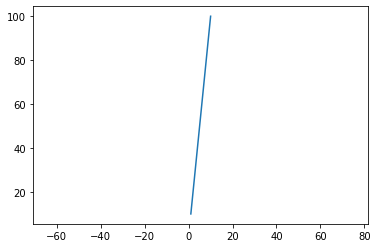

In [38]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.axis('equal')
plt.show()

In [39]:
def rysuj_wykres(alfa): ##wydaje mi sie że gotowe 
    a = wsp_kier_z_azymutu(alfa)
    b = 0
    x = np.linspace(1,10)
    y = a * x + b
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.axis('equal')
    plt.show()

In [43]:
plik_rastra = 'dem.tif'

In [44]:
with rasterio.open(plik_rastra) as src:
    dem = src.read(1)

In [45]:
type(dem)

numpy.ndarray

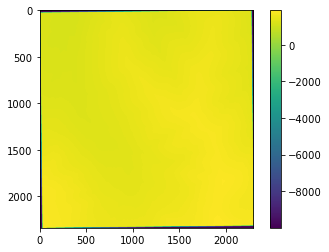

In [46]:
plt.imshow(dem)
plt.colorbar()

In [47]:
with rasterio.open(plik_rastra,'r+') as src:
    src.nodata = -9999
    dem = src.read(1,masked=True)

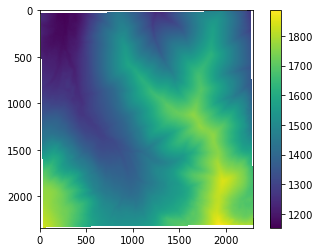

In [48]:
plt.imshow(dem)
plt.colorbar()

In [53]:
x = 540
y = 987

dem[x,y]

1549.27

In [58]:
def sprawdz_wysokosc(model,x,y):
    z = model[x,y]
    print(f"Wysokość punktu {z} m n.p.m")
    return z

In [60]:
wysokosc = sprawdz_wysokosc(dem,1231,1111)

Wysokość punktu 1509.260009765625 m n.p.m
